# Máxima verosimilitud y ajuste polinómico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions1 import *

In [2]:
# import data pkl file
df = pd.read_pickle('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/toy_dataset.pkl')

## 1.
Se busca ajustar un modelo de regresión polinómico $\hat{y}(x,\bold{w})$ de grado $M$:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j \phi _j(x)
$$
donde $M$ es el grado máximo del polinomio y $\phi _j(x) = x^j$. Por lo que:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j x^j
$$

### (a) 
Derivar las ecuaciones para determinar los parámetros óptimos $\bold{w}^∗$ aplicando el principio de máxima verosimilitud, asumiendo que las muestras son independientes e identicamente distribuidas con un ruido Gaussiano $N(0,σ^2)$. Demostrar que $\bold{w}^∗$ es el óptimo global, que maximiza globalmente la verosimilitud (probabilidad conjunta) de los datos de entrenamiento.

     target  input_feature
0  1.032609      -0.250920
1  1.133085       0.901429


Text(0, 0.5, 'Target')

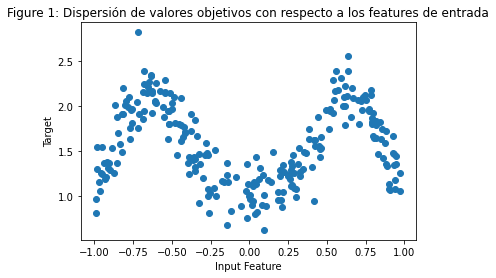

In [10]:
df.rename(columns={'taret': 'target'}, inplace=True)
print(df.head(2))
plt.scatter(df['input_feature'], df['target'])
plt.title('Figure 1: Dispersión de valores objetivos con respecto a los features de entrada')
plt.xlabel('Input Feature')
plt.ylabel('Target')


En el caso dado tenemos que:
$$
y_j = \hat{y}(x_j, \bold{w})+e_N
$$

Donde $\hat{y}$ corresponde al modelo de regresión y $e_N$ es el error (o ruido) de distribución gaussiana.

Considerando esto, la función de verosimilitud es de la siguiente manera:
$$
L(\boldsymbol{w}) = \prod_{j=1}^{M} p(y_j | x_j, \boldsymbol{w}) = \prod_{j=1}^{M} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}} 
$$

Para calcular el $\boldsymbol{w}^*$ tomo el logaritmo natural de la verosimilitud para simplificar el cálculo.
$$
\ln \ L(\boldsymbol{w}) = \sum_{j=1}^{M} \ln ( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}}) = \sum_{j=1}^{M} ( -\frac{1}{2} \ln(2\pi\sigma^2) -\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2} ) \\
= -\frac{M}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{M} (y_j - \hat{y}(x_j, \boldsymbol{w}))^2
$$




El siguiente paso es encontrar $\bold{w}^*$, que equivale a los $\bold{w}$ que maximizan la verosimilitud. Una forma de hacer esto es minimizando el error cuadrático medio, $MSE$ que se define de esta manera:

$$
MSE(w) = \frac{1}{M} \sum_{j=1}^M (y_j-\hat{y}(x_j,\bold{w}))^2
$$

Entonces para minimizar el $MSE$ vamos a derivar e igualar a cero la expresión dada:

$$
\frac{\partial MSE(\bold{w})}{\partial \bold{w}} = \frac{2}{M} \sum_{j=1}^{M} (y_j - \hat{y}(x_j, \bold{w}))(-\bold{\phi}(x_j))=0
$$

Simplificando resulta:
$$
\bold{w}^*=(\Phi^T \cdot \Phi)^{-1} \Phi^Ty
$$

Donde $\Phi$ es una matriz compuesta por las características polinómicas de las muestras del training (empezando por 1 y terminando con el grado $M$)

### b) 
Seleccionar el valor de $M$ más adecuado, entrenando modelos con distintos valores de M y evaluando el error de validación (o validación cruzada, si quisieran). Justificar su decisión mostrando curvas de error de entrenamiento y validación.

In [4]:
# # creo funciones para implementar la regresión lineal

# def train_test_split(df, test_size=0.2, seed=42):
#     # shuffle dataset con una semilla fija
#     df = df.sample(frac=1, random_state=seed).reset_index(drop=True)     
#     train_size = int(df.shape[0] * (1 - test_size))
#     train_df = df.iloc[:train_size].reset_index(drop=True)
#     test_df = df.iloc[train_size:].reset_index(drop=True)
#     return train_df, test_df

# def fit_linear_regression(X, y, M):
#     # Generate polynomial features
#     Phi = np.ones((X.shape[0], 1)) 
#     for i in range(1, M+1):
#         Phi = np.c_[Phi, X**i]
    
#     # Compute weights using the normal equation
#     W = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y
    
#     return W

# # COPIADA DE LA CLASE DE REGRESIÓN LINEAL               !!!!!!!!!!!!!!!!!!!!!!!!!!!
# def get_best_coef(X, Y, M):
#     """
#     Find the best weigths for X and Y
#     """
#     A = np.zeros((M, M)) # matriz de coeficientes
#     S = np.zeros(2*M)
#     b = np.zeros(M) # vector de resultados
#     for i in range(len(X)):
#         aux = Y[i]
#         for j in range(M):
#             b[j] = b[j]+aux
#             aux = aux*X[i]
#         aux = 1.0
#         for j in range(2*M):
#             S[j] = S[j]+aux
#             aux = aux*X[i]
#     for i in range(M):
#         for j in range(M):
#             A[i,j] = S[i+j]
            
#     w = np.linalg.solve(A, b)
#     assert np.allclose(np.dot(A, w), b)
#     return w

# def predict_linear_regression(X, w):
#     poly = np.polynomial.polynomial.Polynomial(w)   
#     return poly(X)

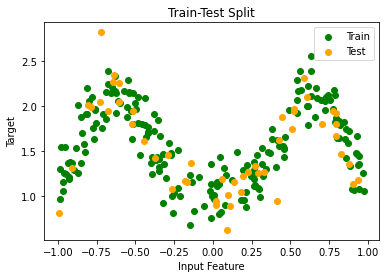

W1 = [ 1.57794626 -0.01053652]


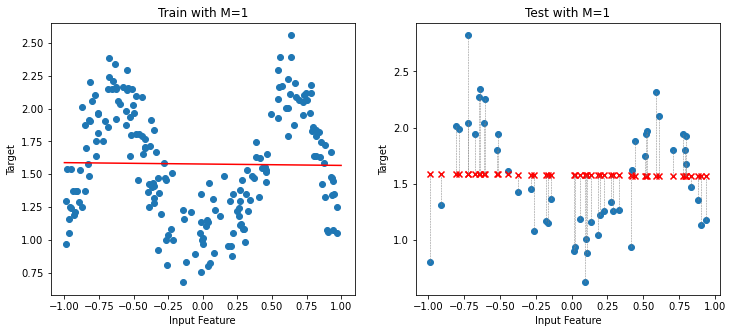

W2 = [ 1.45050585 -0.00440008  0.3530773 ]


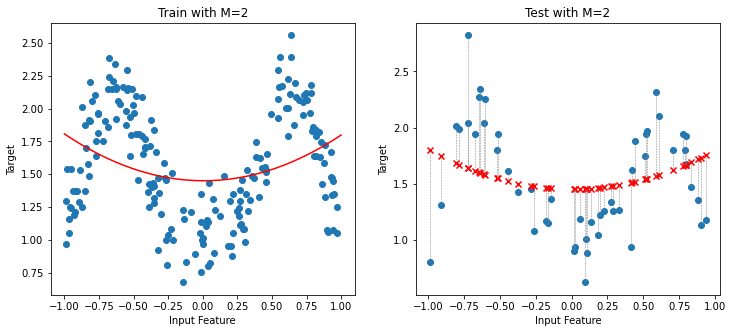

W3 = [ 1.44456135 -0.2040642   0.36695998  0.32652289]


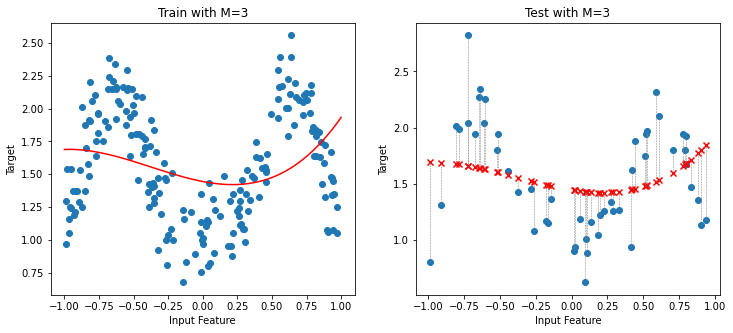

W4 = [ 9.96412860e-01 -1.73813638e-02  4.49134006e+00 -3.35521943e-03
 -4.71269435e+00]


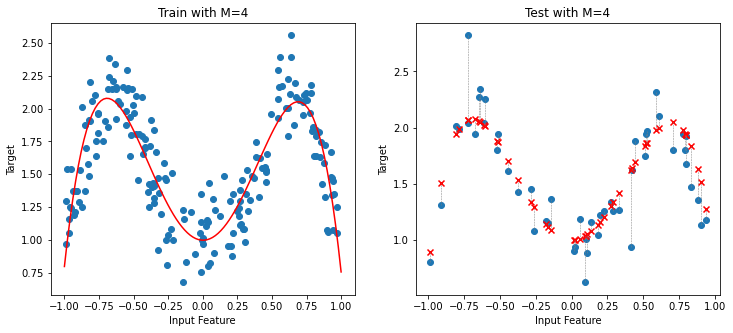

W5 = [ 0.99530215 -0.17113698  4.50975833  0.72954321 -4.74317385 -0.66888981]


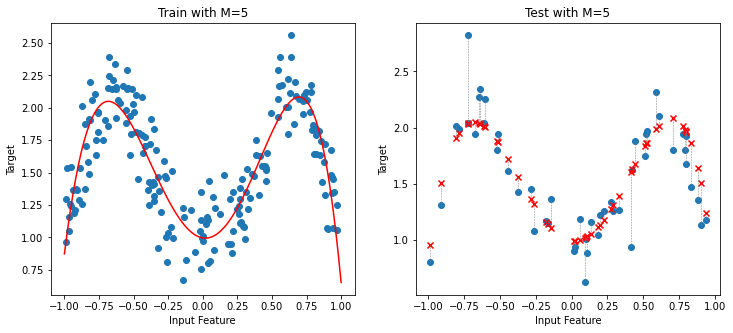

W6 = [ 0.93186019 -0.11702819  5.66889203  0.50190079 -8.15551129 -0.45260725
  2.50804868]


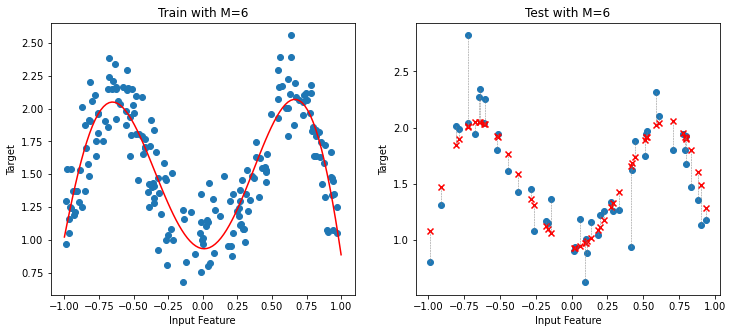

W7 = [ 0.93194988 -0.0301824   5.64460688 -0.28189495 -8.0636342   1.27958723
  2.42799191 -1.0831467 ]


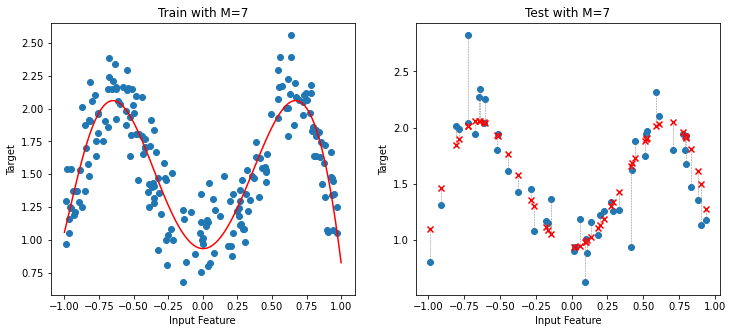

In [5]:
# pruebas sobre el dataset

# separo el dataset en train y test
train_df, test_df = train_test_split(df, seed=42)
# grafico los datos de train y test
plt.scatter(train_df['input_feature'], train_df['target'], label='Train', color='green')
plt.scatter(test_df['input_feature'], test_df['target'], label='Test', color='orange')
plt.legend()
plt.title('Train-Test Split')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.show()



# # M=1
# # entreno el modelo
# W1 = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, 1)
# print(W1)

# # grafico el modelo y los datos
# plt.scatter(train_df['input_feature'], train_df['target'])
# x = np.linspace(-2, 2, 100)
# y = W1[0] + W1[1]*x
# plt.plot(x, y, color='red')
# plt.title('Figure 2: Modelo de regresión lineal con M=1, FIT_LINEAR_REGRESSION')
# plt.show()

# # M=2
# # entreno el modelo con fit_linear_regression
# W2 = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, 2)
# print(W2)

# # grafico el modelo y los datos
# plt.scatter(train_df['input_feature'], train_df['target'])
# x = np.linspace(-2, 2, 100)
# y = W2[0] + W2[1]*x + W2[2]*x**2
# plt.plot(x, y, color='red')
# plt.title('Figure 3: Modelo de regresión cuadrática con M=2, FIT_LINEAR_REGRESSION')
# plt.show()

# # ahora con get_best_coef
# W2 = get_best_coef(train_df['input_feature'].values, train_df['target'].values, 3)
# print(W2)

# # grafico el modelo y los datos
# plt.scatter(train_df['input_feature'], train_df['target'])
# x = np.linspace(-2, 2, 100)
# y = W2[0] + W2[1]*x + W2[2]*x**2
# plt.plot(x, y, color='red')
# plt.title('Figure 3: Modelo de regresión cuadrática con M=2, GET_BEST_COEF')
# plt.show()



for M in range(1,8):
    W = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, M)
    print(f'W{M} = {W}')

    # train
    x = np.linspace(-1.1, 1.1, 100)
    y = predict_linear_regression(x, W)
    

    # test
    y_pred = predict_linear_regression(test_df['input_feature'].values, W)

    # 
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(train_df['input_feature'], train_df['target'])
    x = np.linspace(-1, 1, 100)
    y = predict_linear_regression(x, W)
    axs[0].plot(x, y, color='red')
    axs[0].set_title(f'Train with M={M}')
    axs[0].set_xlabel('Input Feature')
    axs[0].set_ylabel('Target')

    axs[1].scatter(test_df['input_feature'], test_df['target'])
    y_pred = predict_linear_regression(test_df['input_feature'].values, W)
    for i in range(test_df.shape[0]):
        axs[1].plot([test_df['input_feature'].values[i], test_df['input_feature'].values[i]], [test_df['target'].values[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)
    axs[1].scatter(test_df['input_feature'].values, y_pred, color='red', marker='x')
    axs[1].set_title(f'Test with M={M}')
    axs[1].set_xlabel('Input Feature')
    axs[1].set_ylabel('Target')
    
    plt.show()


TRAIN
M(MSE_min) = 22.0 
MSE_min = 0.0353208692452237


TEST
M(MSE_min) = 8.0 
MSE_min = 0.04581651816761068


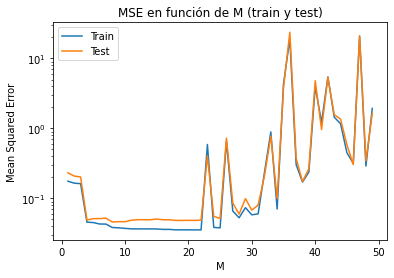

In [6]:
df_mse_train = pd.DataFrame(columns=['M', 'mse'])
df_mse_test = pd.DataFrame(columns=['M', 'mse'])

# for M in range(1, 10):
for M in range(1, len(train_df)//4):
    W = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, M)
    # print(f"m={M}: {W}")

    x = np.linspace(-1.2, 1.2, 100)
    y = 0

    # plt.scatter(train_df['input_feature'], train_df['target'])
    # plt.plot(x, y, color='red')
    # plt.title(f'Figure 2: Modelo de regresión lineal con M={M}, GET_BEST_COEF')
    # plt.xlabel('Input Feature')
    # plt.ylabel('Target')
    # plt.show()

    s_errors = 0
    for _, row in train_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(M+1))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(train_df)
    # print(f"\nMean Squared Error (train): {mse} \n\n")
    df_mse_train = df_mse_train.append({'M': M, 'mse': mse}, ignore_index=True)

    # ahora con el modelo con el dataset de test
    s_errors = 0
    for _, row in test_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(M+1))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(test_df)
    # print(f"\nMean Squared Error (test): {mse} \n\n")
    df_mse_test = df_mse_test.append({'M': M, 'mse': mse}, ignore_index=True)


# # graficos con escala logaritmica
print("TRAIN")
# plt.plot(df_mse_train['M'], df_mse_train['mse'])
# plt.yscale('log')
# plt.title('Mean Squared Error en función de M (train)')
# plt.xlabel('M')
# plt.ylabel('Mean Squared Error')
# plt.show()
M_opt_train = df_mse_train[df_mse_train['mse'] == df_mse_train['mse'].min()]['M'].values[0]
print(f"M(MSE_min) = {M_opt_train} \nMSE_min = {df_mse_train['mse'].min()}")

print("\n\nTEST")
# plt.plot(df_mse_test['M'], df_mse_test['mse'])
# plt.yscale('log')
# plt.title('Mean Squared Error en función de M (test)')
# plt.xlabel('M')
# plt.ylabel('Mean Squared Error')
# plt.show()
M_opt_test = df_mse_test[df_mse_test['mse'] == df_mse_test['mse'].min()]['M'].values[0]
print(f"M(MSE_min) = {M_opt_test} \nMSE_min = {df_mse_test['mse'].min()}")


# AHORA LAS dos curvas juntas
plt.plot(df_mse_train['M'], df_mse_train['mse'], label='Train')
plt.plot(df_mse_test['M'], df_mse_test['mse'], label='Test')
plt.yscale('log')
plt.title('MSE en función de M (train y test)')
plt.xlabel('M')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



In [7]:
# # hacer cross validation con 10 folds (devolver en cada caso los df de train y test)
# def cross_validation(df, k=10, seed=42):
#     train_dfs = []
#     test_dfs = []

#     df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
#     n = df.shape[0] // k
#     for i in range(k):
#         test_df = df.iloc[i*n:(i+1)*n]
#         train_df = df.drop(test_df.index)
#         train_dfs.append(train_df)
#         test_dfs.append(test_df)
#     return train_dfs, test_dfs

In [8]:
# train_dfs, test_dfs = cross_validation(df)

# for i in range(10):

#     df_mse = pd.DataFrame(columns=['M', 'mse'])

#     # for M in range(1, len(train_df)//2):
#     for M in range(1, 100):
#         W = fit_linear_regression(train_dfs[i]['input_feature'].values, train_dfs[i]['target'].values, M)
#         print(f"m={M}: {W}")

#         x = np.linspace(-1.2, 1.2, 100)
#         y = 0

#         for i in range(M):
#             y += W[i]*x**i

#         # plt.scatter(train_df['input_feature'], train_df['target'])
#         # plt.plot(x, y, color='red')
#         # plt.title(f'Figure 2: Modelo de regresión lineal con M={M}, GET_BEST_COEF')
#         # plt.xlabel('Input Feature')
#         # plt.ylabel('Target')
#         # plt.show()

#         s_errors = 0
#         for _, row in test_dfs[i].iterrows():
#             y_pred = sum(W[i] * row['input_feature']**i for i in range(M+1))
#             s_errors += (row['target'] - y_pred)**2
#         mse = s_errors / len(train_dfs[i])
#         print(f"Mean Squared Error: {mse} \n\n")
#         df_mse = df_mse.append({'M': M, 'mse': mse}, ignore_index=True)

#     plt.plot(df_mse['M'], df_mse['mse'])
#     plt.title('Figure 4: Mean Squared Error en función de M')
#     plt.xlabel('M')
#     plt.ylabel('Mean Squared Error')
#     plt.show()

#     # otro grafico pero con escala logaritmica
#     plt.plot(df_mse['M'], df_mse['mse'])
#     plt.yscale('log')
#     plt.title('Figure 5: Mean Squared Error en función de M')
#     plt.xlabel('M')
#     plt.ylabel('Mean Squared Error')
#     plt.show()

#     df_mse
#     M_opt = df_mse[df_mse['mse'] == df_mse['mse'].min()]['M'].values[0]
#     print(f"El valor de M que minimiza el error cuadrático medio es {M_opt} y el error cuadrático medio es {df_mse['mse'].min()}")

### d) 
Reentranar el modelo de regresión polinómica con $M = 20$ y seleccionar un valor adecuado para el parámetro de regularización $\lambda$, donde $\lambda = \frac{\sigma^2}{s^2}$. Mostrar las curvas
de error de entrenamiento y validación que justifiquen su decisión.

100%|██████████| 1000/1000 [00:20<00:00, 49.40it/s]


TRAIN
lambda = 0.0 
MSE = 0.035388639890422624


TEST
lambda = 0.0005005005005005005 
MSE = 0.04499010618069963


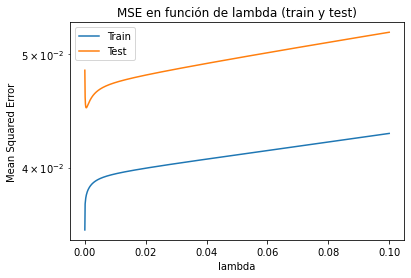

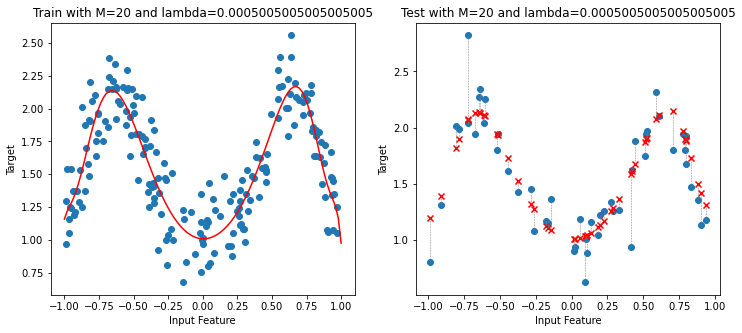

In [9]:
# Reentranar el modelo de regresión polinómica con $M = 20$ y seleccionar un valor adecuado para el parámetro de regularización $\lambda$, donde $\lambda = \frac{\sigma^2}{s^2}$. Mostrar las curvas
# de error de entrenamiento y validación que justifiquen su decisión.

# ridge regression
def fit_ridge_regression(X, y, M, lmbda):
    # Generate polynomial features
    Phi = np.ones((X.shape[0], 1)) 
    for i in range(1, M+1):
        Phi = np.c_[Phi, X**i]
    
    # Compute weights using the normal equation
    W = np.linalg.inv(Phi.T @ Phi + lmbda * np.eye(M+1)) @ Phi.T @ y
    
    return W

lmbda = np.linspace(0, 0.1, 1000) 

df_mse_train = pd.DataFrame(columns=['lambda', 'mse'])
df_mse_test = pd.DataFrame(columns=['lambda', 'mse'])

for l in tqdm.tqdm(lmbda):
    W = fit_ridge_regression(train_df['input_feature'].values, train_df['target'].values, 20, l)
    # print(f"m={M}: {W}")

    x = np.linspace(-1.2, 1.2, 100)
    y = 0

    # plt.scatter(train_df['input_feature'], train_df['target'])
    # plt.plot(x, y, color='red')
    # plt.title(f'Figure 2: Modelo de regresión lineal con M={M}, GET_BEST_COEF')
    # plt.xlabel('Input Feature')
    # plt.ylabel('Target')
    # plt.show()

    s_errors = 0
    for _, row in train_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(21))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(train_df)
    # print(f"\nMean Squared Error (train): {mse} \n\n")
    df_mse_train = df_mse_train.append({'lambda': l, 'mse': mse}, ignore_index=True)

    # ahora con el modelo con el dataset de test
    s_errors = 0
    for _, row in test_df.iterrows():
        y_pred = sum(W[i] * row['input_feature']**i for i in range(21))
        s_errors += (row['target'] - y_pred)**2
        # print(y_pred, end=' ')
    mse = s_errors / len(test_df)
    # print(f"\nMean Squared Error (test): {mse} \n\n")
    df_mse_test = df_mse_test.append({'lambda': l, 'mse': mse}, ignore_index=True)

# graficos con escala logaritmica
print("TRAIN")
# plt.plot(df_mse_train['lambda'], df_mse_train['mse'])
# plt.yscale('log')
# plt.title('Mean Squared Error en función de lambda (train)')
# plt.xlabel('lambda')
# plt.ylabel('Mean Squared Error')
# plt.show()
l_opt_train = df_mse_train[df_mse_train['mse'] == df_mse_train['mse'].min()]['lambda'].values[0]
print(f"lambda = {l_opt_train} \nMSE = {df_mse_train['mse'].min()}")


print("\n\nTEST")
# plt.plot(df_mse_test['lambda'], df_mse_test['mse'])
# plt.yscale('log')
# plt.title('Mean Squared Error en función de lambda (test)')
# plt.xlabel('lambda')
# plt.ylabel('Mean Squared Error')
# plt.show()
l_opt_test = df_mse_test[df_mse_test['mse'] == df_mse_test['mse'].min()]['lambda'].values[0]
print(f"lambda = {l_opt_test} \nMSE = {df_mse_test['mse'].min()}")

# AHORA LAS dos curvas juntas
plt.plot(df_mse_train['lambda'], df_mse_train['mse'], label='Train')
plt.plot(df_mse_test['lambda'], df_mse_test['mse'], label='Test')
plt.yscale('log')
plt.title('MSE en función de lambda (train y test)')    
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# grafico modelo con lambda optimo
W = fit_ridge_regression(train_df['input_feature'].values, train_df['target'].values, 20, l_opt_test)
# train
x = np.linspace(-1.1, 1.1, 100)
y = predict_linear_regression(x, W)

# test
y_pred = predict_linear_regression(test_df['input_feature'].values, W)

#
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(train_df['input_feature'], train_df['target'])
x = np.linspace(-1, 1, 100)
y = predict_linear_regression(x, W)
axs[0].plot(x, y, color='red')
axs[0].set_title(f'Train with M=20 and lambda={l_opt_test}')
axs[0].set_xlabel('Input Feature')
axs[0].set_ylabel('Target')

axs[1].scatter(test_df['input_feature'], test_df['target'])
y_pred = predict_linear_regression(test_df['input_feature'].values, W)

for i in range(test_df.shape[0]):
    axs[1].plot([test_df['input_feature'].values[i], test_df['input_feature'].values[i]], [test_df['target'].values[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.5)
axs[1].scatter(test_df['input_feature'].values, y_pred, color='red', marker='x')
axs[1].set_title(f'Test with M=20 and lambda={l_opt_test}')
axs[1].set_xlabel('Input Feature')
axs[1].set_ylabel('Target')

plt.show()



Tomo el valor $\lambda=0.0005$ que es el que minimiza el $MSE$ en el dataset de testeo.